# Emotion Detection

**Importing Libraries**

In [1]:
import matplotlib.pyplot as plt
from glob import glob   # glob is used to create list of all the files present in the  directory
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("tensorflow version", tf.__version__)


tensorflow version 2.15.0


**Exploring Dataset**

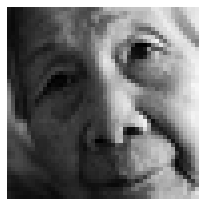

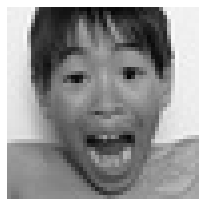

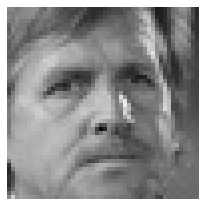

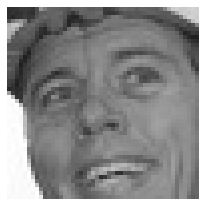

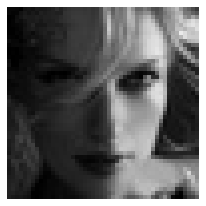

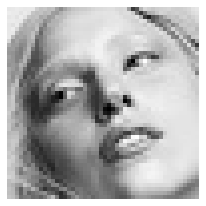

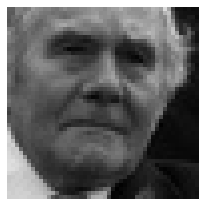

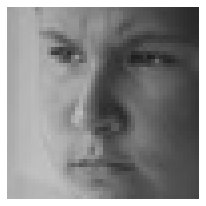

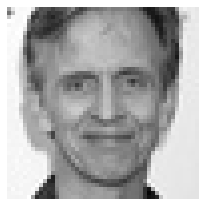

In [2]:
images = glob('train/**/**')
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image)); plt.axis('off')

## Preparing Data for Training

In [3]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                   target_size = (img_size, img_size),
                                                   color_mode = "grayscale",
                                                   batch_size= batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                   target_size = (img_size, img_size),
                                                   color_mode = "grayscale",
                                                   batch_size= batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Defining Model

In [4]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding= 'same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [5]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32, (3,3))
    conv_2 = Convolution(inputs, 64, (5,5))
    conv_3 = Convolution(inputs, 126, (3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten, 256)
    
    output = Dense(7, activation='softmax')(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [7]:
model = model_fer((48,48,1))
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 126)       1260      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 126)       504       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 126)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 126)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 126)       0  

## Initializing Model

In [8]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size

validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint ("model_weights1.h5", monitor = 'val_accuracy', save_weights_only =True, mode='max', verbose =1) 
callbacks = [checkpoint]


## Traning the Model

In [ ]:
history = model.fit(
x  = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data  = validation_generator,
validation_steps= validation_steps,
callbacks=callbacks)

Epoch 1/20


448/448 [==============================] - ETA: 0s - loss: 1.6490 - accuracy: 0.3770
Epoch 1: saving model to model_weights1.h5
448/448 [==============================] - 361s 794ms/step - loss: 1.6490 - accuracy: 0.3770 - val_loss: 1.5808 - val_accuracy: 0.3730
Epoch 2/20
448/448 [==============================] - ETA: 0s - loss: 1.3501 - accuracy: 0.4859
Epoch 2: saving model to model_weights1.h5
448/448 [==============================] - 395s 882ms/step - loss: 1.3501 - accuracy: 0.4859 - val_loss: 1.5443 - val_accuracy: 0.3877
Epoch 3/20
448/448 [==============================] - ETA: 0s - loss: 1.1927 - accuracy: 0.5535
Epoch 3: saving model to model_weights1.h5
448/448 [==============================] - 363s 808ms/step - loss: 1.1927 - accuracy: 0.5535 - val_loss: 1.4277 - val_accuracy: 0.4573
Epoch 4/20
317/448 [====================>.........] - ETA: 1:46 - loss: 1.0544 - accuracy: 0.6101

## model evaluate

In [ ]:
model.evaluate(validation_generator)

## Plotting loss

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)

## Plotting accuracy

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.0, bottom=0.0, right=0.95, left=0, hspace=0.25, wspace=0.35)

## saving model

In [ ]:
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)